In [1]:
import time
#import board
#import busio
import pandas as pd
from pandas import DataFrame
from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clrs
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib
import seaborn as sns
import datetime
import os

from datetime import datetime, timedelta

In [2]:
def file():
    
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    suffix = '.csv'
    filePath = os.path.join(os.getcwd(), file_name + suffix)
    return  filePath

In [3]:
file()

'/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql/csvFile_2021_04_19.csv'

In [4]:
path = os.path.basename(file()).split('.')[0]
suffix = '.png'
filepath = path + 'Tem' +suffix#os.path.join(path, suffix)
filepath

'csvFile_2021_04_19Tem.png'

In [5]:
def filePath2Pandas(file_path):
    drop_column = 'Unnamed: 0'
    return pd.read_csv(file_path, delimiter=',').drop(drop_column, axis = 'columns')
df_gross=filePath2Pandas(file())   

In [6]:
df_gross.columns

Index(['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T0', 'T1', 'T2', 'T3',
       'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ'],
      dtype='object')

In [7]:
    df_tem = df[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']]
    #dfT = dfT[['T4', 'T3', 'T2', 'T1', 'T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    df_tem = df_tem.rename({'T4':'T0', 'T3':'T1', 'T2':'T2', 'T1':'T3', 'T0':'T4', 'T9':'T5', 'T8':'T6',\
              'T7':'T7','T6':'T8','T5':'T9'}, axis='columns')


NameError: name 'df' is not defined

In [8]:
df_gross[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']]

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,31.1860,29.5598,23.5021,23.0626,22.7584,31.4910,31.2199,30.7794,30.8810,31.4571
1,31.1521,29.8307,23.5698,23.0626,22.7584,31.3555,31.1521,30.7455,30.9827,31.4232
2,31.1182,30.0679,23.6036,23.0964,22.7584,31.2877,31.1860,30.6438,30.9149,31.2877
3,31.0166,30.1695,23.7050,23.1640,22.7584,31.2538,31.0505,30.6100,30.7794,31.2199
4,30.9827,30.3728,23.9755,23.1640,22.7584,31.2199,30.9149,30.5761,30.7794,31.2538
...,...,...,...,...,...,...,...,...,...,...
1249,26.9188,27.2234,27.3927,27.5619,25.7344,31.6605,27.3588,27.1896,26.9188,27.0880
1250,26.9526,27.2234,27.4265,27.5281,25.7344,31.4571,27.3588,27.2234,26.9865,27.0880
1251,26.9865,27.2573,27.3927,27.5619,25.8021,31.3555,27.3588,27.1557,27.0203,27.0542
1252,27.0542,27.2911,27.3927,27.5958,25.9036,31.2199,27.3927,27.2234,27.0203,27.0880


In [9]:
#df_time = pd.to_datetime(df_gross[['dateTime']].stack()).dt.time.astype(int)/ 10**9
#f_time = pd.to_timedelta(df_gross[['dateTime']].stack())
#df_time = df_gross[['dateTime']].split()
df_time = pd.to_datetime(df_gross[['dateTime']].stack()).dt.time
#df_time.unstack().value()

In [10]:
df_time

0     dateTime    11:37:43
1     dateTime    11:37:48
2     dateTime    11:37:53
3     dateTime    11:37:58
4     dateTime    11:38:05
                    ...   
1249  dateTime    13:50:38
1250  dateTime    13:50:43
1251  dateTime    13:50:50
1252  dateTime    13:50:57
1253  dateTime    13:51:04
Length: 1254, dtype: object

In [11]:
df_time.unstack().groupby([times.hour, times.minute])

NameError: name 'times' is not defined

In [12]:
df_time.dtypes

dtype('O')

In [13]:
d = pd.date_range('2018-01-01', periods=3, freq='H')

In [14]:
def dateFromDateTimeObject(df):
    df_dateTime = pd.to_datetime(df[['dateTime']].stack())
    #df_dateTime.unstack()
    return df_dateTime.unstack()

In [15]:
def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap

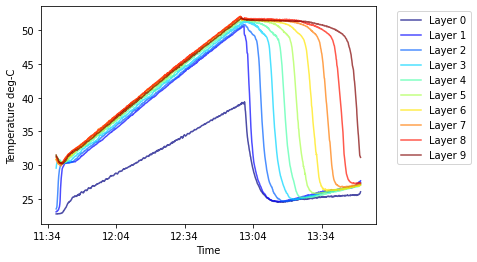

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Time', ylabel='Temperature deg-C'>)

In [16]:

#scm = create_color_step_obj(cmap_name, 10)
#plt.ion()
#plt.rcParams["figure.figsize"]=5,5
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 8
#fig_size[1] = 3
def plotObject_tem(df, alpha =0.7, scm=None):
    cmap_name = "jet"
    fig = plt.figure()
    ax = fig.add_subplot()
    #plt.style.use('fivethirtyeight') 
    #plt.rcParams['text.usetex'] = True
    #plt.rcParams['font.size'] = 18
    #df_tem = df[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']]
    df_tem = df[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    df_tem = df_tem[df_tem>0]
    #print ('chnaged coloumns:', df_tem)
    df_Time = dateFromDateTimeObject(df)
    scm = create_color_step_obj(cmap_name, 10)
    for i in range (0,  df_tem.shape[1]):
        ax.plot(df_Time, df_tem.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Layer ' + str(i))
        ax.legend(bbox_to_anchor=(0.4,0.8))
        ax.set_ylabel('Temperature deg-C')
        ax.set_xlabel('Time')
        ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    fig.canvas.draw()
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    #figname = os.path.basename(file())
    #figSuffix = '.png'
    path = os.path.basename(file()).split('.')[0]
    suffix = '.png'
    filepath = path + 'Tem' +suffix#os.path.join(path, suffix)
    #filepath
    fig.savefig(filepath)
    #plt.legend(loc='upper left')
    return fig, ax
plotObject_tem(df_gross, alpha =0.7, scm=None)

In [17]:
#In tihs case tank was already stratified so stratified charging efficiency increased already
# We are not interested how much time it took to charge, we are interested in teh temperature reach and smoothly
#as possible

No handles with labels found to put in legend.
/home/yogender/miniconda3/envs/keras/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='Time', ylabel='kW'>)

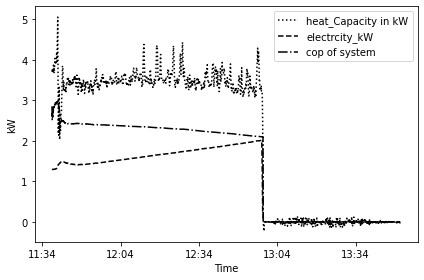

In [17]:
def plotObject_cop(df):
    fig = plt.figure()
    ax = fig.add_subplot()
    #plt.style.use('fivethirtyeight') 
    
    df['cop_copied'] = np.where((df.Heat_Capacity_kW >=-1) & (df.Heat_Capacity_kW <=0.2), 0, df.COP)
    cop_df = df['cop_copied']
    #cop_df = cop_df[cop_df<5]
    heatCapacity_df = df[['Heat_Capacity_kW']]
    electrictyKW_df = df[['electrcity_kW']]
    time_df = dateFromDateTimeObject(df)
    
    #fig.canvas.draw()
    ax.legend(loc='best')
    ax.set_xlabel('Time')
    ax.set_ylabel('kW', color='k')
    ax.plot(time_df, heatCapacity_df, label = 'heat_Capacity in kW',  color ='k', ls='dotted')
    #ax.plot(time_df, heatCapacity_df, label = 'heat_Capacity in kW', color ='k', ls='dashed')
    ax.plot(time_df, electrictyKW_df, label = 'electrcity_kW', color ='k', ls='dashed')
    ax.plot(time_df ,cop_df  , label = 'cop of system', color ='k', ls='dashdot')
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    #axTwin.plot(df.index, Nan2Zero(df).iloc[:, -2]*100, label = 'Discharge Efficiency', color = 'b')
    #axTwin.set_ylabel('nDischarge',color ='b')
    ax.legend(bbox_to_anchor=(0.4,0.8))
    #plt.subplots_adjust(wspace = 0.5)
    #fig.canvas.draw()
    ax.legend()
    fig.tight_layout()
    fig.show()
    path = os.path.basename(file()).split('.')[0]
    suffix = '.png'
    filepath = path + 'COP' +suffix#os.path.join(path, suffix)
    #filepath
    fig.savefig(filepath)
    return fig, ax
    
plotObject_cop(df_gross)   
    

/home/yogender/miniconda3/envs/keras/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

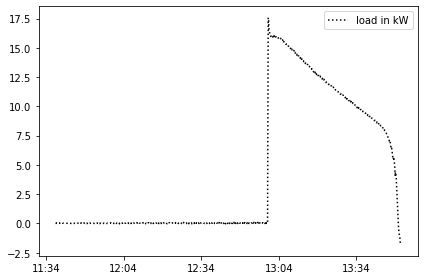

In [18]:
def Load(df):
    
    fig = plt.figure()
    ax = fig.add_subplot()
    df_load_kW = df[[ 'Load_kW']]
    df_nDis = df[['nDis']]
    time_df = dateFromDateTimeObject(df)
    ax.plot(time_df, df_load_kW, label = 'load in kW', color='k',  ls='dotted')
    #ax.plot(time_df, df_nDis, label = 'heat_Capacity in kW', color ='k', ls='dashed')
    #ax.plot(time_df, df_nDis, label = 'electrcity_kW', color ='k', ls='dashed')
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.legend()
    fig.tight_layout()
    fig.show()
    path = os.path.basename(file()).split('.')[0]
    suffix = '.png'
    filepath = path + 'Load' +suffix#os.path.join(path, suffix)
    #filepath
    fig.savefig(filepath)
    return fig, ax

Load(df_gross)
    
    

         nDis
3    0.004241
4    0.006479
5    0.008896
6    0.010634
7    0.013042
8    0.015453
9    0.017154
10   0.019532
11   0.021903
12   0.024264
13   0.025946
14   0.028302
15   0.029980
16   0.032317
17   0.033986
18   0.036331
19   0.039015
20   0.041026
21   0.043033
22   0.045386
23   0.047790
24   0.050094
25   0.052503
26   0.054189
27   0.057213
28   0.059634
29   0.061244
30   0.063686
31   0.065364
32   0.067714
33   0.069805
34   0.072149
35   0.074585
36   0.076263
37   0.077943
38   0.080294
39   0.082401
40   0.084513
41   0.086861
42   0.089199
43   0.091759
44   0.094099
45   0.095887
46   0.098121
47   0.100589
48   0.102937
49   0.105284
50   0.107880
51   0.109548
52   0.112008
53   0.114142
54   0.116343
55   0.118682
56   0.121162
57   0.123111
58   0.125598
59   0.128743
60   0.130407
61   0.133044
62   0.135359
63   0.137838
64   0.139658
65   0.141970
66   0.144283
67   0.146440
68   0.148605
69   0.150765
70   0.152929
71   0.155097
72   0.157405
73   0

/home/yogender/miniconda3/envs/keras/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

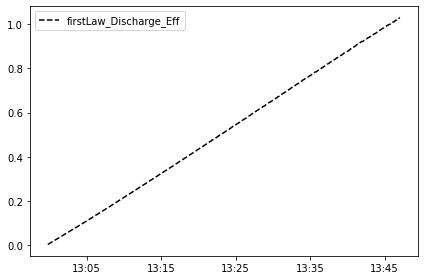

In [25]:
def nDis(df):
    
    fig = plt.figure()
    ax = fig.add_subplot()
    
    #remove all the rows from df based on the Nans in nDis coloumns
    df_removeNan = df.dropna(subset = ['nDis'])
    df_nDis= df_removeNan[['nDis']]
    print (df_nDis.to_string())
    
    #calculate the length of the df with non Nan nDis
    len_x = len(df_nDis)
    
    #take only taht time values where discharge if going on. Its calculated based on the Load
    #or discharge. See the load_kw fig. Discharge is only from approx: 9:57 -10-37
    #we need this time to be able to plot nDis- first law effciciency against this time.
    #So tak eall the values of Load_kW which is greater than 0.5 this is random significant load number,
    #it can be 1, 0.7. We pass [['dateTime']] to take the date time from dfs
    dfs = df.loc[df['Load_kW']>0.5 ][['dateTime']]
    
    #then pass the len of df_nDis into this so the x and y war of the same length
    time_df = dfs.iloc[:len_x]

    
    time_df = dateFromDateTimeObject(time_df)
    
    #ax.plot(time_df, heatCapacity_df, label = 'heat_Capacity in kW', color ='k', ls='dashed')
    ax.plot(time_df, df_nDis, label = 'firstLaw_Discharge_Eff', color ='k', ls='dashed')
    #ax.plot(time_df, df_nDis, label = 'firstLaw_Discharge_Eff', color ='k', ls='dashed')
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.legend()
    fig.tight_layout()
    fig.show()
    path = os.path.basename(file()).split('.')[0]
    suffix = '.png'
    filepath = path + 'FirstLaw_DischrgeEff' +suffix#os.path.join(path, suffix)
    #filepath
    fig.savefig(filepath)
    return fig, ax

nDis(df_gross)

nStratDis is:      nStratDischarge
0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
5                NaN
6                NaN
7                NaN
8                NaN
9                NaN
10               NaN
11               NaN
12               NaN
13               NaN
14               NaN
15               NaN
16               NaN
17               NaN
18               NaN
19               NaN
20               NaN
21               NaN
22               NaN
23               NaN
24               NaN
25               NaN
26               NaN
27               NaN
28               NaN
29               NaN
30               NaN
31               NaN
32               NaN
33               NaN
34               NaN
35               NaN
36               NaN
37               NaN
38               NaN
39               NaN
40               NaN
41               NaN
42               NaN
43               NaN
44               NaN
45               NaN

/home/yogender/miniconda3/envs/keras/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

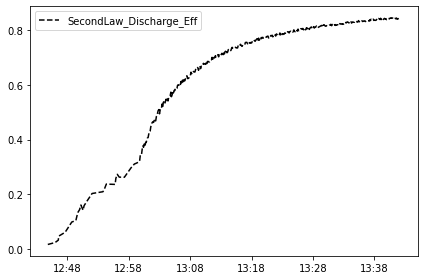

In [20]:
def nStratDis(df):
    fig = plt.figure()
    ax = fig.add_subplot()
    df_noNan = df.dropna(subset = ['nStratDischarge'])
    nStratDis = df_noNan[['nStratDischarge']] 
    nStratDis = nStratDis[nStratDis>0]
    print ('nStratDis is:',nStratDis.to_string() )
    #nStratDis
    len_xx = len(nStratDis)
    print ('length of nStratDis is:', len_xx)
    dfs = df.loc[df['Load_kW']>0.05 ][['dateTime']]
    print ('length of df is :', dfs)
    time_df = dfs.iloc[:len_xx]
    #len_time = len(time_df )
    time_df = dateFromDateTimeObject(time_df)
    print ('length of time_df is :', time_df, len(time_df))
    ax.plot(time_df, nStratDis, label = 'SecondLaw_Discharge_Eff', color ='k', ls='dashed')
    #ax.plot(time_df, df_nDis, label = 'firstLaw_Discharge_Eff', color ='k', ls='dashed')
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.legend()
    fig.tight_layout()
    fig.show()
    path = os.path.basename(file()).split('.')[0]
    suffix = '.png'
    filepath = path + 'SecondLaw_DischrgeEff' +suffix#os.path.join(path, suffix)
    #filepath
    fig.savefig(filepath)
    return fig, ax
nStratDis(df_gross)

No handles with labels found to put in legend.
/home/yogender/miniconda3/envs/keras/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


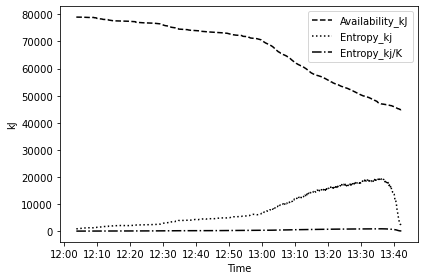

In [21]:
def availibility_disc(df):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.legend(loc='best')
    ax.set_xlabel('Time')
    ax.set_ylabel('kJ', color='k')
    
    df_noNan = df.dropna(subset = ['DisTotalTanksEnergyForAvailability_kJ'])
    availability = df_noNan[['DisTotalTanksEnergyForAvailability_kJ']] 
    availability = availability[availability>0]
    len_xx = len(availability)
    
    entropy_kj = df_noNan[['DisEntropy_kj']]
    entropy_kjPerK = df_noNan[['DisEntropy_kj/K']]
    
    len_xx = len(availability)
    dfs = df.loc[df['Load_kW']>0.05 ][['dateTime']]
    time_df = dfs.iloc[:len_xx]
    time_df = dateFromDateTimeObject(time_df)
    ax.plot(time_df, availability, label = 'Availability_kJ', color ='k', ls='dashed')
    ax.plot(time_df, entropy_kj, label = 'Entropy_kj', color ='k', ls='dotted')
    ax.plot(time_df, entropy_kjPerK, label = 'Entropy_kj/K', color ='k', ls='dashdot')
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.legend()
    fig.tight_layout()
    fig.show()
    path = os.path.basename(file()).split('.')[0]
    suffix = '.png'
    filepath = path + 'Avail_Disch' +suffix#os.path.join(path, suffix)
    #filepath
    fig.savefig(filepath)
availibility_disc(df_gross)

No handles with labels found to put in legend.


     nStratCharging
0        301.044757
1         84.604706
2         47.678140
3         32.692708
4         23.625519
5         19.629713
6         15.317388
7         13.768368
8         12.358416
9         11.328046
10         9.727422
11         9.371336
12         8.555903
13         7.693378
14         7.097689
15         6.291108
16         5.901000
17         5.805251
18         5.326100
19         4.908780
20         4.419934
21         3.243261
22         2.233628
23         1.092089
24         0.320544
25        -0.389967
26        -1.202152
27        -1.657554
28        -2.044052
29        -2.374905
30        -2.727588
31        -3.015238
32        -3.369393
33        -3.189918
34        -3.571807
35        -3.672911
36        -3.731332
37        -3.726186
38        -3.510164
39        -3.456758
40        -3.476324
41        -3.485746
42        -3.303314
43        -3.306422
44        -3.165234
45        -2.972873
46        -3.033128
47        -2.778066
48        -2.693825


/home/yogender/miniconda3/envs/keras/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='Time', ylabel='Eff'>)

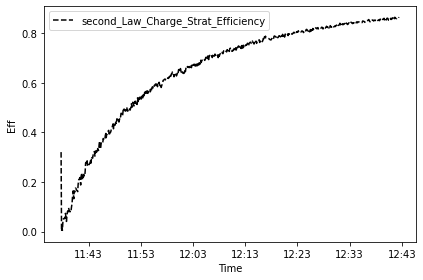

In [22]:
def nStratCharg(df):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.legend(loc='best')
    ax.set_xlabel('Time')
    ax.set_ylabel('Eff', color='k')
    df_Heat_Capacity_kW_time = df.loc[df_gross['Heat_Capacity_kW']>0.2][['dateTime']]
    df_noNan = df.dropna(subset = ['nStratCharging'])
    #time_df = df_noNan[['dateTime']]
    
    #print (time_df)
    nStratCharge = df_noNan[['nStratCharging']] 
    print (nStratCharge.to_string())
    nStratCharge  = nStratCharge [(nStratCharge >0) &(nStratCharge <0.872) ].dropna()
    #print (nStratCharge)
    len_xx = len(nStratCharge)
    time_df = df_Heat_Capacity_kW_time.iloc[:len_xx]
    time_df = dateFromDateTimeObject(time_df)
    
    ax.plot(time_df, nStratCharge, label = 'second_Law_Charge_Strat_Efficiency', color ='k', ls='dashed')
    #ax.plot(time_df, entropy_kj, label = 'Entropy_kj', color ='k', ls='dotted')
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.legend()
    fig.tight_layout()
    fig.show()
    path = os.path.basename(file()).split('.')[0]
    suffix = '.png'
    filepath = path + 'Second_Law_Strat_Charge_Eff' +suffix#os.path.join(path, suffix)
    #filepath
    fig.savefig(filepath)
    return fig, ax
nStratCharg(df_gross)

No handles with labels found to put in legend.


y and x are : 784 784


/home/yogender/miniconda3/envs/keras/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


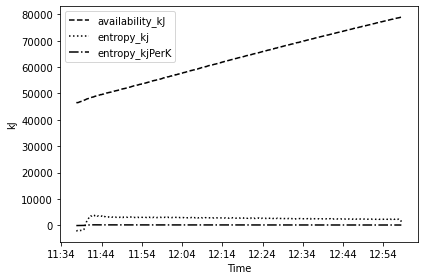

In [23]:
def availablity_charge(df):
    
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.legend(loc='best')
    ax.set_xlabel('Time')
    ax.set_ylabel('kJ', color='k')
    df_noNan = df.dropna(subset = ['TotalTanksEnergyForAvailability_kJ'])
    availability = df_noNan[['TotalTanksEnergyForAvailability_kJ']] 
    availability = availability[(availability>0) &  (availability<90000)]
    
    entropy_kj = df_noNan[['entropy_kJ']]
    entropy_kjPerK = df_noNan[['entropy_kJ/K']]
    
    df_Heat_Capacity_kW_time = df.loc[df_gross['Heat_Capacity_kW']>0.2][['dateTime']]
    
    len_small_xORy = min (len(availability), len(df_Heat_Capacity_kW_time ) )
    if len(availability) < len(df_Heat_Capacity_kW_time):
        availability = availability
        entropy_kj = entropy_kj
        entropy_kjPerK = entropy_kjPerK 
        time_df =  df_Heat_Capacity_kW_time.iloc[:len_small_xORy]
        time_df = dateFromDateTimeObject(time_df)
        print ('y and x are :', len (availability), len (time_df))

    else:
        availability = availability.iloc[:len_small_xORy ]
        entropy_kj = entropy_kj.iloc[:len_small_xORy ]
        entropy_kjPerK = entropy_kjPerK.iloc[:len_small_xORy ]
        time_df = df_Heat_Capacity_kW_time
        time_df = dateFromDateTimeObject(time_df)
        print ('y and x are :', len (availability), len (time_df))

    
    ax.plot(time_df, availability, label = 'availability_kJ', color ='k', ls='dashed')
    ax.plot(time_df, entropy_kj, label = 'entropy_kj', color ='k', ls='dotted')
    ax.plot(time_df, entropy_kjPerK, label = 'entropy_kjPerK', color ='k', ls='dashdot')
    #ax.plot(time_df, entropy_kj, label = 'Entropy_kj', color ='k', ls='dotted')
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.legend()
    fig.tight_layout()
    fig.show()
    path = os.path.basename(file()).split('.')[0]
    suffix = '.png'
    filepath = path + 'Avail_charge' +suffix
    #filepath
    fig.savefig(filepath)
        
availablity_charge(df_gross)    
    

In [7]:
df_noNan_charge_Avail = df_gross.dropna(subset = ['TotalTanksEnergyForAvailability_kJ'])

NameError: name 'df_gross' is not defined

In [8]:
availability = df_noNan_charge_Avail[['TotalTanksEnergyForAvailability_kJ']]
availability = availability[availability>0]
availability

NameError: name 'df_noNan_charge_Avail' is not defined

In [9]:
electrictyKW_df = df_gross[['electrcity_kW']]
print (electrictyKW_df.to_string())

NameError: name 'df_gross' is not defined

In [10]:
availability = availability.iloc[:len(df_Heat_Capacity_kW_time) ]
availability

NameError: name 'availability' is not defined

In [11]:
df_Heat_Capacity_kW_time = df_gross.loc[df_gross['Heat_Capacity_kW']>0.2][['dateTime']]
df_Heat_Capacity_kW_time

NameError: name 'df_gross' is not defined

In [12]:
len_small_xORy = min (len(availability), len(df_Heat_Capacity_kW_time ) )
len_small_xORy 

NameError: name 'availability' is not defined

In [13]:
df_Heat_Capacity_kW_time = df_gross.copy().loc[df_gross['Heat_Capacity_kW']>0.2][['dateTime']]
#df_Heat_Capacity_kW = df_gross.copy().loc[df_gross['Heat_Capacity_kW']>0.2]
#df_time = df.loc[df['Load_kW']>0.5 ][['dateTime']]
#df_heat = df_gross.copy()['Heat_Capacity_kW']
#print (df_Heat_Capacity_kW.to_string())
len(df_Heat_Capacity_kW_time)

NameError: name 'df_gross' is not defined

In [14]:
df_noNan = df_gross.dropna(subset = ['nStratCharging'])
df_noNan_Time = df_noNan[['dateTime']]
nStratCharge = df_noNan[['nStratCharging']]
nStratCharge  = nStratCharge [(nStratCharge >0) &(nStratCharge <0.999999) ].dropna()
len_xx = len(nStratCharge)
time_df = df_Heat_Capacity_kW_time.iloc[:len_xx]

NameError: name 'df_gross' is not defined

In [223]:
nStratCharge

,nStratCharging
323,0.018829
324,0.029926
325,0.029223
326,0.038377
327,0.065696
...,...
805,0.879292
806,0.878851
807,0.878171
808,0.880827


In [224]:
time_df

,dateTime
631,2021-04-20 09:01:22
632,2021-04-20 09:01:29
641,2021-04-20 09:02:26
642,2021-04-20 09:02:31
643,2021-04-20 09:02:38
...,...
1112,2021-04-20 09:52:11
1113,2021-04-20 09:52:18
1114,2021-04-20 09:52:23
1115,2021-04-20 09:52:30


In [190]:
df_noNan_Time

,dateTime
0,2021-04-20 07:58:22
1,2021-04-20 07:58:27
2,2021-04-20 07:58:32
3,2021-04-20 07:58:38
4,2021-04-20 07:58:44
...,...
805,2021-04-20 09:19:20
806,2021-04-20 09:19:25
807,2021-04-20 09:19:32
808,2021-04-20 09:19:39


In [189]:
print (nStratCharge.to_string())

     nStratCharging
0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
5               NaN
6               NaN
7               NaN
8               NaN
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19              NaN
20              NaN
21              NaN
22              NaN
23              NaN
24              NaN
25              NaN
26              NaN
27              NaN
28              NaN
29              NaN
30              NaN
31              NaN
32              NaN
33              NaN
34              NaN
35              NaN
36              NaN
37              NaN
38              NaN
39              NaN
40              NaN
41              NaN
42              NaN
43              NaN
44              NaN
45              NaN
46              NaN
47              NaN
48              NaN


In [159]:
df_noNan = df_gross.dropna(subset = ['DisTotalTanksEnergyForAvailability_kJ'])
availability = df_noNan[['DisTotalTanksEnergyForAvailability_kJ']]
availability = availability[availability>0]
len_xx = len(availability)

In [156]:
availability

,DisTotalTanksEnergyForAvailability_kJ
0,80737.784275
1,80766.676728
2,80756.146079
3,80743.012698
4,80682.561273
...,...
412,38541.089141
413,38505.031071
414,38479.752815
415,38416.398477


In [152]:
df_noNan 

,id,dateTime,Tamb,TtopTestTankHPCir,TbottomTestTankHpCir,TtopSourceTank,TloadTankMix,TTopTestTankLoadCir,TloadMix,TbottomSourceTank,...,timeStamp_watt,entropy_kJ/K,entropy_kJ,nStratCharging,TotalTanksEnergyForAvailability_kJ,DisEntropy_kj/K,DisEntropy_kj,nStratDischarge,DisTotalTanksEnergyForAvailability_kJ,cop_copied
0,203,2021-04-20 07:58:22,21.8120,30.8471,23.4683,19.5824,25.3623,31.8977,25.1593,16.9492,...,0.000556,147.284646,3139.785225,-63846.483772,45995.265563,16.389728,353.508280,-51.862969,80737.784275,0.0
1,206,2021-04-20 07:58:27,21.8120,30.8471,23.5698,19.5486,25.3623,31.8977,25.2608,16.9492,...,0.001389,150.200533,3178.466209,20042.498051,45963.636911,31.354392,684.595640,-29.397750,80766.676728,0.0
2,209,2021-04-20 07:58:32,21.8120,30.8471,23.5021,19.5824,25.3284,31.8638,25.3284,16.8817,...,0.001944,148.022275,3251.287388,3983.207437,45974.219553,45.000802,963.130340,-17.169071,80756.146079,0.0
3,212,2021-04-20 07:58:38,21.7782,30.8471,23.4683,19.5486,25.2946,31.9316,25.2946,16.9492,...,0.001389,148.436138,3183.993123,4513.508090,45963.597498,58.227244,1264.893208,-11.794604,80743.012698,0.0
4,216,2021-04-20 07:58:44,21.7782,30.8133,23.4683,19.5824,25.2946,31.8977,25.2946,16.9155,...,0.001667,146.861997,3182.502303,4286.641280,45958.253101,65.018258,1419.565487,-8.459412,80682.561273,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1622,2021-04-20 08:38:58,21.8120,30.6777,23.5698,19.6161,21.6768,31.7622,25.8021,16.9829,...,0.001389,179.502231,3913.349343,0.480841,60764.894383,379.734584,8316.358968,0.898740,38541.089141,0.0
413,1626,2021-04-20 08:39:05,21.7782,30.6777,23.5698,19.6837,21.7106,31.7622,25.8021,16.9492,...,0.001944,180.930932,3920.896873,0.483118,60893.716506,412.446455,8817.081456,0.901176,38505.031071,0.0
414,1630,2021-04-20 08:39:11,21.7782,30.6777,23.6036,19.6499,21.6768,31.7622,25.7682,16.9492,...,0.001667,181.874334,3863.543207,0.492680,60950.379835,478.270387,10304.806448,0.900415,38479.752815,0.0
415,1633,2021-04-20 08:39:17,21.7782,30.6438,23.6036,19.6499,21.6430,31.7961,25.7344,16.9829,...,0.001667,180.248170,3793.726196,0.504216,61053.163751,510.638346,10887.619235,0.901465,38416.398477,0.0


In [97]:
df_copied = df_gross.copy().dropna(subset = ['nDis'])
df_nDis= df_copied[['nDis']]
len_x = len(df_nDis)
len_x

385

In [94]:

#df['load_copied'] = np.where((df.Heat_Capacity_kW >=-1) & (df.Heat_Capacity_kW <=0.2), 0, df.COP)
df =  df_gross.copy()
dfs = df.loc[df['Load_kW']>0.5 ][['dateTime']]

In [100]:
def_time = dfs.iloc[:len_x]
def_time

,dateTime
1150,2021-04-20 09:56:17
1151,2021-04-20 09:56:24
1152,2021-04-20 09:56:29
1153,2021-04-20 09:56:36
1154,2021-04-20 09:56:43
...,...
1530,2021-04-20 10:38:26
1531,2021-04-20 10:38:34
1532,2021-04-20 10:38:40
1533,2021-04-20 10:38:46


In [35]:
nDis = df_gross[['nDis']].dropna(axis=0)

In [36]:
print (nDis.to_string())

         nDis
465  0.013114
466  0.004070
467  0.004868
468  0.006925
469  0.009226
470  0.011616
471  0.013368
472  0.015646
473  0.017861
474  0.019710
475  0.021831
476  0.023362
477  0.025517
478  0.027648
479  0.029159
480  0.031314
481  0.034073
482  0.036197
483  0.037968
484  0.040096
485  0.041658
486  0.043710
487  0.045973
488  0.048295
489  0.050541
490  0.053041
491  0.055418
492  0.057504
493  0.059982
494  0.062332
495  0.064733
496  0.067132
497  0.069521
498  0.071901
499  0.073948
500  0.076340
501  0.078723
502  0.081199
503  0.083491
504  0.085964
505  0.088597
506  0.090635
507  0.092670
508  0.095046
509  0.097424
510  0.100488
511  0.102184
512  0.104556
513  0.106937
514  0.108631
515  0.111011
516  0.113052
517  0.115427
518  0.117671
519  0.120180
520  0.121747
521  0.124248
522  0.125809
523  0.128322
524  0.130567
525  0.133761
526  0.135459
527  0.137839
528  0.139878
529  0.142778
530  0.144635
531  0.147010
532  0.148546
533  0.151093
534  0.153464
535  0

In [25]:
Load = df_gross[['Load_kW']]

In [26]:
print (Load.to_string())

        Load_kW
0      0.005106
1      0.012649
2      0.012548
3      0.012649
4      0.012598
5      0.027625
6      0.005065
7      0.019949
8      0.005044
9      0.005065
10    -0.002408
11     0.005044
12    -0.002379
13    -0.002389
14     0.012446
15     0.012395
16     0.005003
17    -0.002369
18     0.012345
19     0.012395
20     0.012395
21    -0.009741
22     0.012294
23     0.004962
24     0.012294
25     0.012294
26     0.012294
27     0.012294
28     0.012243
29     0.019625
30     0.012294
31     0.012294
32     0.004922
33     0.012193
34    -0.002340
35     0.012092
36     0.012142
37     0.012193
38     0.012142
39    -0.002340
40     0.012092
41     0.012092
42    -0.009541
43     0.012041
44     0.012092
45     0.011991
46     0.026402
47     0.026292
48     0.011991
49     0.011991
50     0.011940
51     0.011990
52     0.011890
53    -0.002291
54     0.018978
55     0.026069
56     0.011889
57     0.011889
58     0.011889
59     0.011889
60    -0.009301
61     0

In [ ]:
df['cop_copied'] = np.where((df.Heat_Capacity_kW >=-1) & (df.Heat_Capacity_kW <=0.2), 0, df.COP)

In [243]:
heatCapacity_df = df_gross[['Heat_Capacity_kW']]

In [245]:
df = df_gross.copy()

In [263]:
df['cop_copied'] = np.where((df.Heat_Capacity_kW >=-1) & (df.Heat_Capacity_kW <=0.01), 0, df.COP)

In [261]:
#pd.DataFrame(df['cop_copied']).to_strings()
#print (pd.DataFrame(df['cop_copied']).to_strings())
print (df['cop_copied'].to_string())

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
15      0.000000
16      0.000000
17      0.000000
18      0.000000
19      0.000000
20      0.000000
21      0.000000
22      0.000000
23      0.000000
24      0.000000
25      0.000000
26      0.000000
27      0.000000
28      0.000000
29      0.000000
30      0.000000
31      0.000000
32      0.000000
33      0.000000
34      0.000000
35      0.000000
36      0.000000
37      0.000000
38      0.000000
39      0.000000
40      0.000000
41      0.000000
42      0.000000
43      0.000000
44      0.000000
45      0.000000
46      0.000000
47      0.000000
48      0.000000
49      0.000000
50      0.000000
51      0.000000
52      0.000000
53      0.000000
54      0.000000
55      0.000000
56      0.000000
57      0.000000
58      0.0000

In [244]:
print (heatCapacity_df.to_string())

      Heat_Capacity_kW
0            -0.003937
1            -0.003882
2            -0.003918
3             0.016115
4            -0.003919
5            -0.003937
6            -0.043230
7            -0.003900
8             0.016040
9            -0.003937
10           -0.023876
11           -0.003918
12           -0.023767
13           -0.023877
14           -0.003918
15           -0.043836
16           -0.003882
17           -0.023767
18           -0.003918
19           -0.003900
20            0.035667
21            0.016040
22           -0.003900
23           -0.023767
24           -0.003918
25           -0.003918
26           -0.003918
27            0.035831
28           -0.043634
29           -0.003918
30           -0.003918
31           -0.003918
32           -0.003900
33           -0.043634
34            0.015818
35           -0.003918
36           -0.003900
37           -0.003900
38           -0.023766
39           -0.003882
40           -0.003900
41           -0.003900
42         

In [240]:
print (cop.to_string())

           COP
0    -0.692295
1    -0.952699
2    -0.590907
3     0.450162
4     0.172241
5    -0.006628
6    -1.003635
7    -0.976622
8    -0.577392
9    -0.595802
10   -0.803247
11   -0.797305
12   -1.017269
13   -1.305476
14   -1.262694
15   -1.605535
16   -1.560559
17   -1.665551
18   -1.618166
19   -1.566316
20   -1.170882
21   -0.955664
22   -0.936106
23   -1.095458
24   -1.091428
25   -1.073367
26   -1.062578
27   -0.796322
28   -1.084615
29   -1.065704
30   -1.052377
31   -1.045165
32   -1.035977
33   -1.211876
34   -1.078618
35   -1.059913
36   -1.052280
37   -1.043274
38   -1.106247
39   -1.097048
40   -1.082914
41   -1.074571
42   -0.970493
43   -0.821183
44   -0.979824
45   -0.892305
46   -0.739821
47   -0.732909
48   -0.814306
49   -0.810190
50   -0.923080
51   -0.920344
52   -0.916611
53   -0.910047
54   -0.832743
55   -0.828772
56   -0.829451
57   -0.724301
58   -0.572157
59   -0.576564
60   -0.625547
61   -0.670436
62   -0.672469
63   -0.671654
64   -0.581952
65   -0.70

In [117]:
#nStratDis= df_gross[['nStratDischarge']].dropna(axis=0)
df_noNan = df_gross.copy().dropna(subset = ['nStratDischarge'])
df_noNan_time = df_noNan[['dateTime']]
df_noNan_time

,dateTime
0,2021-04-20 07:58:22
1,2021-04-20 07:58:27
2,2021-04-20 07:58:32
3,2021-04-20 07:58:38
4,2021-04-20 07:58:44
...,...
412,2021-04-20 08:38:58
413,2021-04-20 08:39:05
414,2021-04-20 08:39:11
415,2021-04-20 08:39:17


In [125]:
nStratDis = df_noNan[['nStratDischarge']] 
#nStratDis
len_xx = len(nStratDis)
len_xx

417

In [126]:
df =  df_gross.copy()
dfs = df.loc[df['Load_kW']>0.5 ][['dateTime']]
dfs




,dateTime
1150,2021-04-20 09:56:17
1151,2021-04-20 09:56:24
1152,2021-04-20 09:56:29
1153,2021-04-20 09:56:36
1154,2021-04-20 09:56:43
...,...
1561,2021-04-20 10:41:59
1562,2021-04-20 10:42:06
1563,2021-04-20 10:42:12
1564,2021-04-20 10:42:21


In [128]:
def_time = dfs.iloc[:len_xx]
def_time

,dateTime
1150,2021-04-20 09:56:17
1151,2021-04-20 09:56:24
1152,2021-04-20 09:56:29
1153,2021-04-20 09:56:36
1154,2021-04-20 09:56:43
...,...
1561,2021-04-20 10:41:59
1562,2021-04-20 10:42:06
1563,2021-04-20 10:42:12
1564,2021-04-20 10:42:21


In [111]:
df_time_nstartDis = df_gross[['']]

,nStratDischarge
0,-51.862969
1,-29.397750
2,-17.169071
3,-11.794604
4,-8.459412
...,...
412,0.898740
413,0.901176
414,0.900415
415,0.901465


In [113]:
print (nStratDis.to_string() )

     nStratDischarge
0         -51.862969
1         -29.397750
2         -17.169071
3         -11.794604
4          -8.459412
5          -6.471358
6          -5.206461
7          -4.551550
8          -3.794079
9          -3.290064
10         -2.914369
11         -2.626268
12         -2.296897
13         -2.039954
14         -1.884677
15         -1.619770
16         -1.518998
17         -1.409436
18         -1.267776
19         -1.087601
20         -0.994779
21         -0.977487
22         -0.862095
23         -0.783121
24         -0.702153
25         -0.593695
26         -0.538484
27         -0.509122
28         -0.444839
29         -0.340983
30         -0.302382
31         -0.266759
32         -0.223571
33         -0.197119
34         -0.154474
35         -0.095923
36         -0.085436
37         -0.055321
38         -0.020258
39          0.027763
40          0.044037
41          0.073724
42          0.098369
43          0.092909
44          0.115274
45          0.164116
46          0